In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

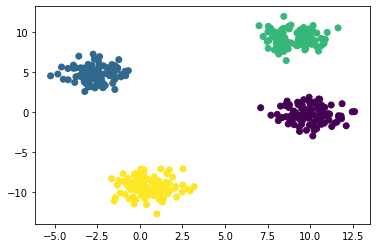

In [20]:
num_center = 4
X,y = make_blobs(400,2,centers=num_center)
plt.scatter(X[:,0],X[:,1], c=y)
# plt.xlim((-20,20))
# plt.ylim((-20,20))
plt.show()

In [32]:
# K-means
# random initialization
X_min, X_max = np.min(X), np.max(X)
K = num_center
local_centroid = []
for i in range(K):
    local_centroid.append(np.array((np.random.random_integers(X_min, X_max), np.random.random_integers(X_min, X_max))))

print(local_centroid)
# assign points to the nearest cluster


numOfSample = X.shape[0]

def func_cluster(numOfSample, X, local_centroid): 
    X_label = []
    for i in range(numOfSample):
        dist = []
        for cluster_idx in range(K):
            dist.append(np.linalg.norm(X[i,:]-local_centroid[cluster_idx]))

        dist_min = min(dist)
        dist_min_idx = dist.index(dist_min)
        X_label.append(dist_min_idx)
    return X_label

X_label = func_cluster(numOfSample, X, local_centroid)

for i in range(numOfSample):
    new_centroid = []
    for cluster_idx in range(K):
        centroid_x, centroid_y = 0, 0
        if X_label[i] == cluster_idx:
            centroid_x += X[i, 0]
            centroid_y += X[i, 1]
            



[array([3, 3]), array([-7,  5]), array([-5, -3]), array([-1, -2])]
[1, 0, 1, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 1, 1, 1, 1, 3, 1, 1, 0, 0, 0, 0, 3, 3, 3, 0, 1, 1, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 3, 3, 1, 0, 1, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 3, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 3, 3, 3, 0, 1, 3, 0, 0, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 1, 1, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 2, 0, 1, 0, 1, 1, 3, 3, 0, 0, 1, 0, 1, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 1, 3, 0, 0, 3,

/Users/xiaoranzhang/opt/anaconda3/envs/Xiaoran/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(-12.698357814892043, 12.607370128508503 + 1) instead
  import sys
